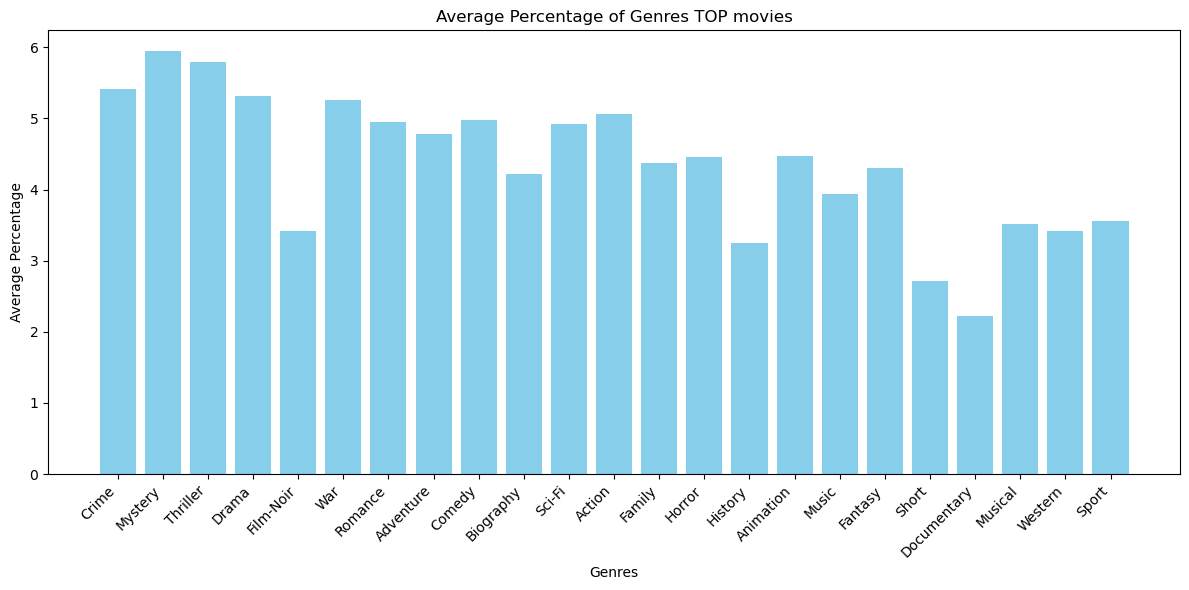

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'movie_genre_tfIDF_top_prueba.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Function to parse the 'All Genres' column into a dictionary
def parse_all_genres(row):
    if pd.isna(row):  # Handle empty or NaN cells
        return {}
    genre_dict = {}
    for item in row.split(', '):
        genre, percentage = item.split(': ')
        genre_dict[genre] = float(percentage.strip('%'))
    return genre_dict

# Parse the 'All Genres' column
df['Parsed Genres'] = df['All Genres'].apply(parse_all_genres)

# Combine all parsed genre dictionaries
all_genres = {}
for genres in df['Parsed Genres']:
    for genre, percentage in genres.items():
        all_genres[genre] = all_genres.get(genre, []) + [percentage]

# Calculate average percentages for each genre
avg_genres = {genre: sum(percentages) / len(percentages) for genre, percentages in all_genres.items()}

# Plotting the average percentages
plt.figure(figsize=(12, 6))
plt.bar(avg_genres.keys(), avg_genres.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Percentage of Genres TOP movies')
plt.xlabel('Genres')
plt.ylabel('Average Percentage')
plt.tight_layout()
plt.show()


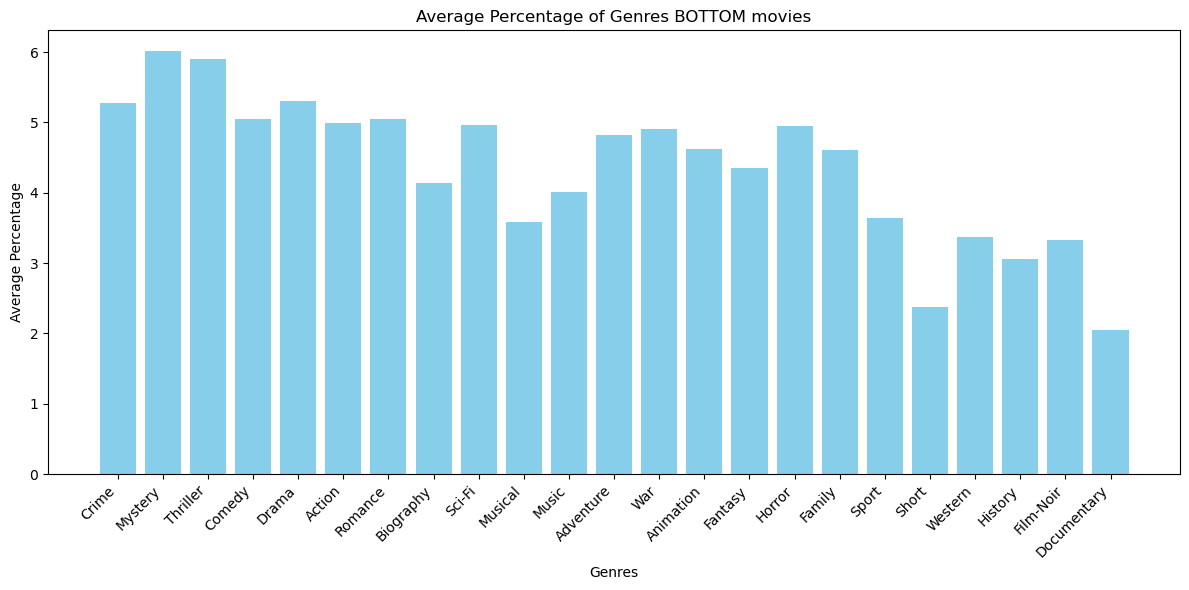

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'movie_genre_tfIDF_bottom_prueba.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Function to parse the 'All Genres' column into a dictionary
def parse_all_genres(row):
    if pd.isna(row):  # Handle empty or NaN cells
        return {}
    genre_dict = {}
    for item in row.split(', '):
        genre, percentage = item.split(': ')
        genre_dict[genre] = float(percentage.strip('%'))
    return genre_dict

# Parse the 'All Genres' column
df['Parsed Genres'] = df['All Genres'].apply(parse_all_genres)

# Combine all parsed genre dictionaries
all_genres = {}
for genres in df['Parsed Genres']:
    for genre, percentage in genres.items():
        all_genres[genre] = all_genres.get(genre, []) + [percentage]

# Calculate average percentages for each genre
avg_genres = {genre: sum(percentages) / len(percentages) for genre, percentages in all_genres.items()}

# Plotting the average percentages
plt.figure(figsize=(12, 6))
plt.bar(avg_genres.keys(), avg_genres.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Percentage of Genres BOTTOM movies')
plt.xlabel('Genres')
plt.ylabel('Average Percentage')
plt.tight_layout()
plt.show()


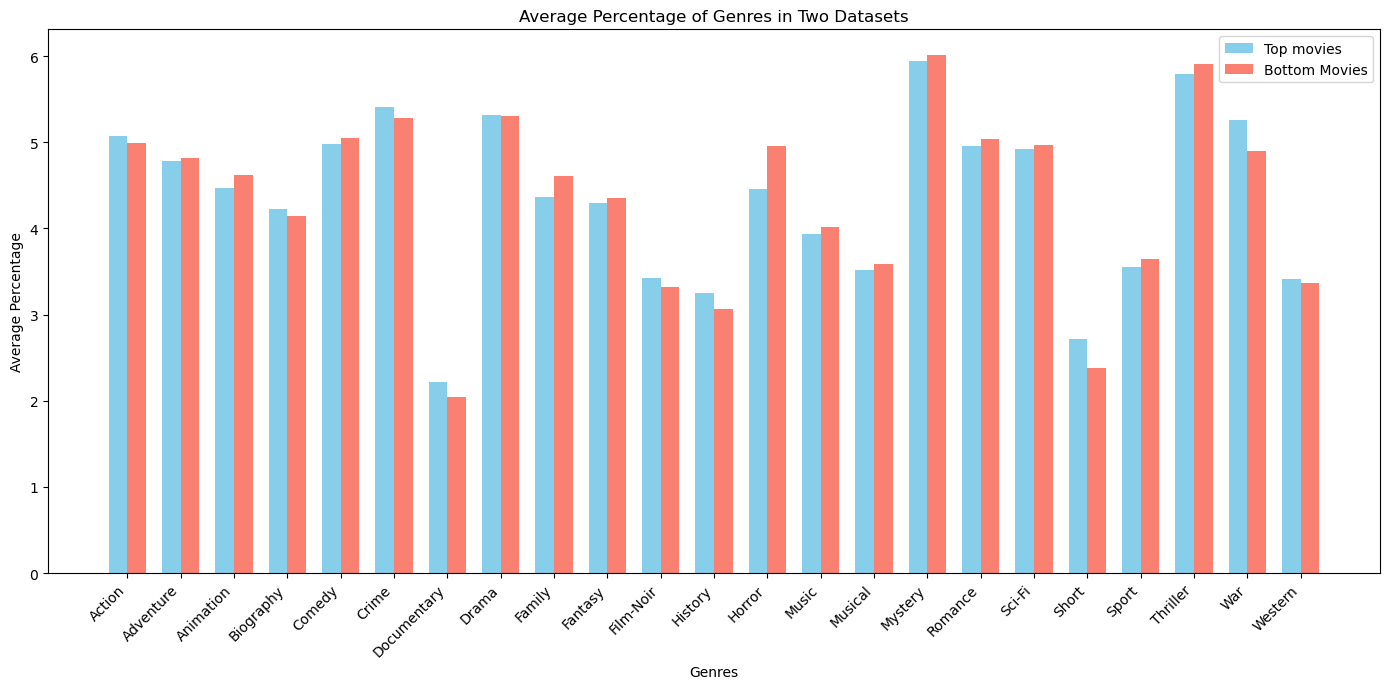

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to parse the 'All Genres' column into a dictionary
def parse_all_genres(row):
    if pd.isna(row):  # Handle empty or NaN cells
        return {}
    genre_dict = {}
    for item in row.split(', '):
        genre, percentage = item.split(': ')
        genre_dict[genre] = float(percentage.strip('%'))
    return genre_dict

# Load and process the first CSV file
file1 = 'movie_genre_tfIDF_top_prueba.csv'  # Replace with your first file path
df1 = pd.read_csv(file1)
df1['Parsed Genres'] = df1['All Genres'].apply(parse_all_genres)

# Load and process the second CSV file
file2 = 'movie_genre_tfIDF_bottom_prueba.csv'  # Replace with your second file path
df2 = pd.read_csv(file2)
df2['Parsed Genres'] = df2['All Genres'].apply(parse_all_genres)

# Function to calculate average percentages
def calculate_avg_genres(df):
    all_genres = {}
    for genres in df['Parsed Genres']:
        for genre, percentage in genres.items():
            all_genres[genre] = all_genres.get(genre, []) + [percentage]
    avg_genres = {genre: sum(percentages) / len(percentages) for genre, percentages in all_genres.items()}
    return avg_genres

# Calculate averages for both datasets
avg_genres_1 = calculate_avg_genres(df1)
avg_genres_2 = calculate_avg_genres(df2)

# Align genres for consistent plotting
all_genres = sorted(set(avg_genres_1.keys()).union(avg_genres_2.keys()))
avg_1 = [avg_genres_1.get(genre, 0) for genre in all_genres]
avg_2 = [avg_genres_2.get(genre, 0) for genre in all_genres]

# Plotting
x = np.arange(len(all_genres))  # X-axis positions
width = 0.35  # Width of the bars

plt.figure(figsize=(14, 7))

# Bars for the first dataset
plt.bar(x - width/2, avg_1, width, label='Top movies', color='skyblue')

# Bars for the second dataset
plt.bar(x + width/2, avg_2, width, label='Bottom Movies', color='salmon')

# Labels and formatting
plt.xticks(x, all_genres, rotation=45, ha='right')
plt.title('Average Percentage of Genres in Two Datasets')
plt.xlabel('Genres')
plt.ylabel('Average Percentage')
plt.legend()
plt.tight_layout()
plt.show()
